In [ ]:
''' Overview
 Cardiovascular diseases (CVDs), including heart disease, are the leading cause of death
 worldwide. Early detection of heart disease is critical for preventing serious health outcomes
 and improving the quality of life for patients. With the increasing availability of medical data,
 machine learning models can be used to predict whether a patient is likely to develop heart
 disease based on certain health indicators.
 In this project, you will build a classification model to predict whether an individual is likely to
 have heart disease or not. The dataset provided includes various health and demographic
 factors such as age, blood pressure, cholesterol levels, and lifestyle habits (e.g., smoking
and alcohol consumption). The goal is to train a model to identify which individuals have
 heart disease based on these features.'''

In [ ]:
'''. Problem Statement
 You are provided with a dataset that contains health-related information about individuals.
 Your task is to develop a machine learning model that can predict the presence of heart
 disease based on the provided features. The target variable in the dataset is "disease,"
 which indicates whether a person has heart disease (1) or not (0).'''

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)

In [2]:
#Loading the dataset

df = pd.read_csv("Data_file_3.csv")
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


Missing Values :
 active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
smoke          0
weight         0
disease        0
dtype: int64

 Target Distribution :
 disease
0    35021
1    34979
Name: count, dtype: int64


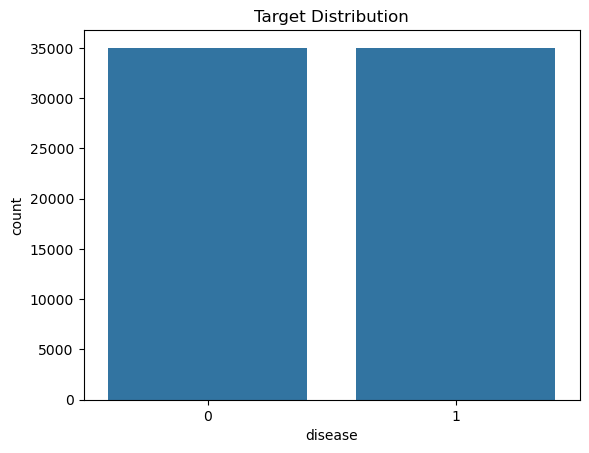

In [3]:
#Data Preprocessing

#Conversion of the age from days to years
df['age'] = (df['age']/365).astype(int)

#Droping the irrelevant columns
df.drop(['id','date','country','occupation'], axis = 1, inplace = True)

#Checking for the missing values 
print("Missing Values :\n", df.isnull().sum())

#Basic stats and Balance check
print('\n Target Distribution :\n', df['disease'].value_counts())
sns.countplot(data=df, x='disease')
plt.title("Target Distribution")
plt.show()

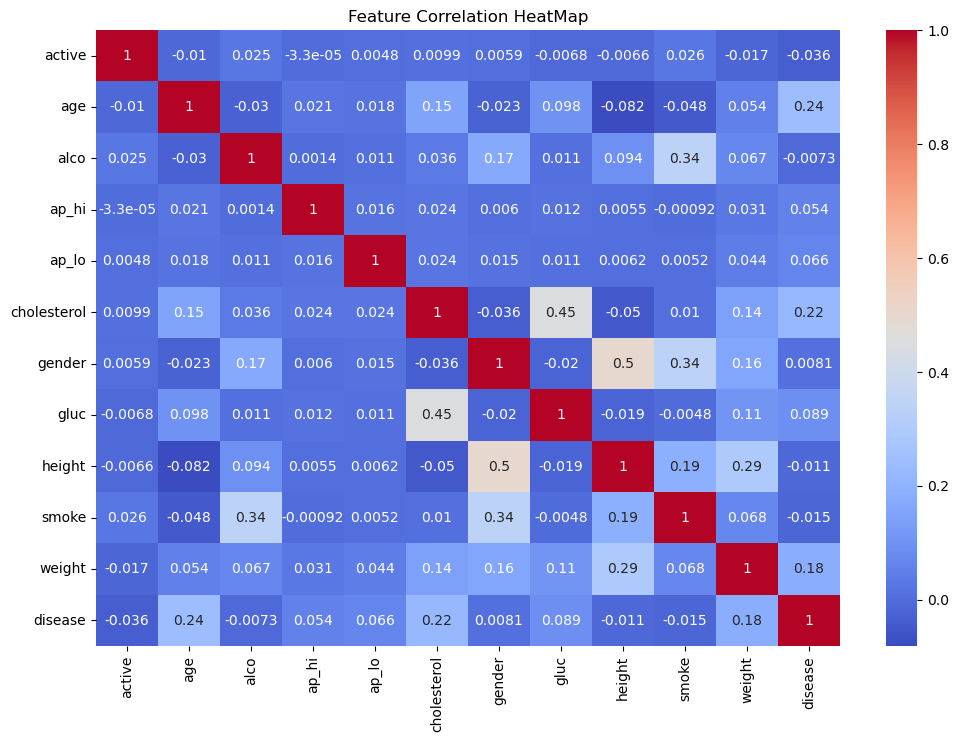

In [4]:
#Feature Correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation HeatMap")
plt.show()

In [5]:
#Feature and target split

x = df.drop('disease', axis = 1)
y = df['disease']

In [11]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [12]:
#standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model: Logistic Regression
Accuracy: 0.7227142857142858
Precision: 0.7446076899030947
Recall: 0.679406731317741
F1 Score: 0.7105145413870246
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



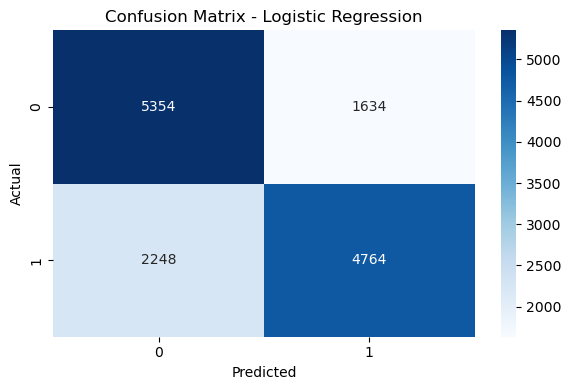


Model: Decision Tree
Accuracy: 0.6369285714285714
Precision: 0.6424457244129376
Recall: 0.6203650884198517
F1 Score: 0.6312123630559385
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      6988
           1       0.64      0.62      0.63      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



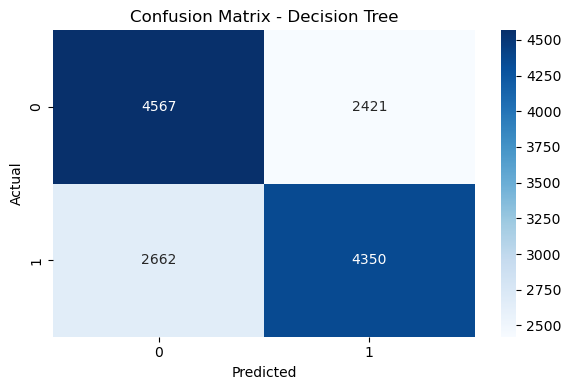


Model: Support Vector Machine
Accuracy: 0.7322857142857143
Precision: 0.7477231329690346
Recall: 0.7025099828864804
F1 Score: 0.7244117647058823
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



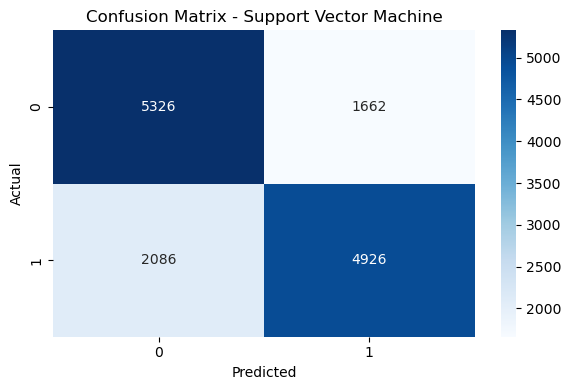

In [13]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

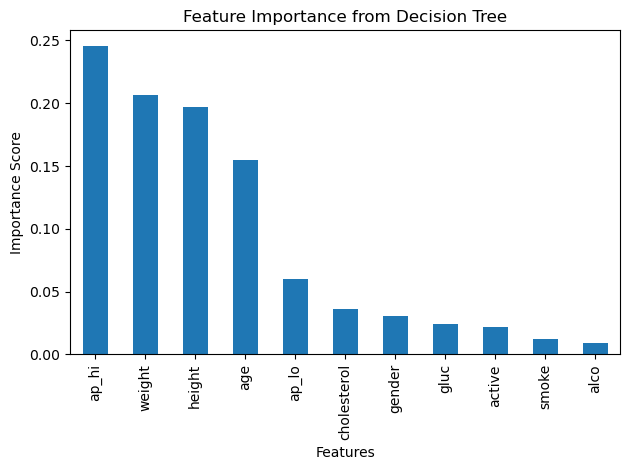

In [18]:
# Train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(model_dt.feature_importances_, index=x.columns)

# Plot feature importances
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance from Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()